In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Text(0, 0.5, 'Feature4')

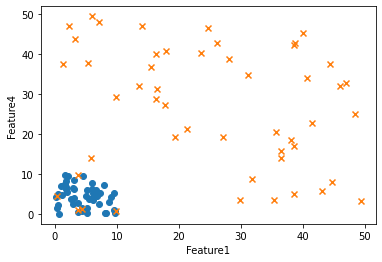

In [172]:
data = np.zeros((100,5), dtype=float)

np.random.seed(42)
data[:50,4] = 0
data[50:,4] = 1

for i in range(data.shape[1]-1):
    data[:50, i] = np.random.random((1,50))*10
    data[50:, i] = np.random.random((1,50))*50

df = pd.DataFrame(data, columns= ['Feature'+str(i) for i in range(1,5)]+['label'])
df.to_csv("DataSet.csv", index=False)

plt.scatter(df[ df['label']==0.0 ]['Feature1'], df[ df['label']==0.0 ]['Feature4'], marker='o', Label=0)
plt.scatter(df[ df['label']==1.0 ]['Feature1'], df[ df['label']==1.0 ]['Feature4'], marker='x', Label=1)
plt.xlabel('Feature1')
plt.ylabel('Feature4')

del df

In [230]:
# reading the created RandomDataSet.csv
df = pd.read_csv('DataSet.csv')

In [231]:
class Perceptron:
    def __init__(self, features, epochs=1000, learning_rate=0.01):
        self.epochs = epochs
        self.features = features
        self.learning_rate = learning_rate
        self.weights = np.zeros(features + 1)
           
    def predict(self, inputs):
        summation = self.weights[0]
        summation += sum([inputs[j]*self.weights[j+1] for j in range(self.features)])
        if summation > 0:
          activation = 1
        else:
          activation = 0 
        return activation

    def train(self, tinputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(tinputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [232]:
data = df.to_numpy()

test = np.vstack((data[:20], data[50:70]))
train = np.vstack((data[20:50], data[70:]))

features = train[:,:-1]
labels = train[:,-1]


In [233]:
p = Perceptron(features.shape[1])

In [234]:
print(features[1,:])
p.predict(features[1,:])

[1.39493861 8.960913   5.68308603 7.14595923]


0

In [235]:
p.train(features[10:,:], labels)

In [236]:
print("Labels\tPredicted")
for i in range(test.shape[0]):
    print(f'{test[i,-1]}\t{p.predict(test[i,:-1])}')

Labels	Predicted
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
0.0	0
1.0	1
1.0	1
1.0	1
1.0	1
1.0	0
1.0	1
1.0	0
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	1
1.0	0
1.0	1


In [237]:
# 3.177918	43.866968	4.699097	43.873601 1
p.predict([3,43,4,43])

1